In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
train_data = pd.read_csv('train.csv')
train_data

C:\Users\HP\AppData\Local\Temp\ipykernel_3684\3390170144.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [3]:
test_data = pd.read_csv("test.csv")
test_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [4]:
store= pd.read_csv("store.csv")
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


***Combine the train and Store Data***

In [5]:
train_store_combine_data = train_data.merge(store, on='Store', how='left')

train_store_combine_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


***Changeing the date to DateTime Format***

In [6]:
train_store_combine_data['Date'] = pd.to_datetime(train_store_combine_data['Date'])

In [7]:
train_store_combine_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [8]:
train_store_combine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [9]:
train_store_combine_data.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [10]:
train_store_combine_data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_3684\2218367949.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_store_combine_data.corr()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.026413,-0.050746,-0.004592,0.008488,0.009865,0.038928
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000025,0.000006,-0.000025,0.000168,0.000174,0.000049
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.019229,-0.028257,0.012659,-0.091040,0.059558,-0.021127
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.102861,-0.030954,0.008931,-0.150159,0.040531,0.028974
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.007992,0.001384,0.002771,-0.008309,-0.002430,0.001637
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000138,-0.000023,0.000152,-0.000983,-0.001008,-0.000283
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003689,-0.000526,0.001520,-0.006909,-0.003133,-0.003682
CompetitionDistance,-0.026413,-0.000025,-0.019229,-0.102861,0.007992,0.000138,-0.003689,1.000000,-0.061624,0.025397,-0.139886,-0.054384,-0.109695
CompetitionOpenSinceMonth,-0.050746,0.000006,-0.028257,-0.030954,0.001384,-0.000023,-0.000526,-0.061624,1.000000,-0.060594,-0.009383,-0.036251,0.050326
CompetitionOpenSinceYear,-0.004592,-0.000025,0.012659,0.008931,0.002771,0.000152,0.001520,0.025397,-0.060594,1.000000,-0.077336,-0.079784,0.012155


C:\Users\HP\AppData\Local\Temp\ipykernel_3684\4094004178.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=train_store_combine_data.corr(),annot=True)


<Axes: >

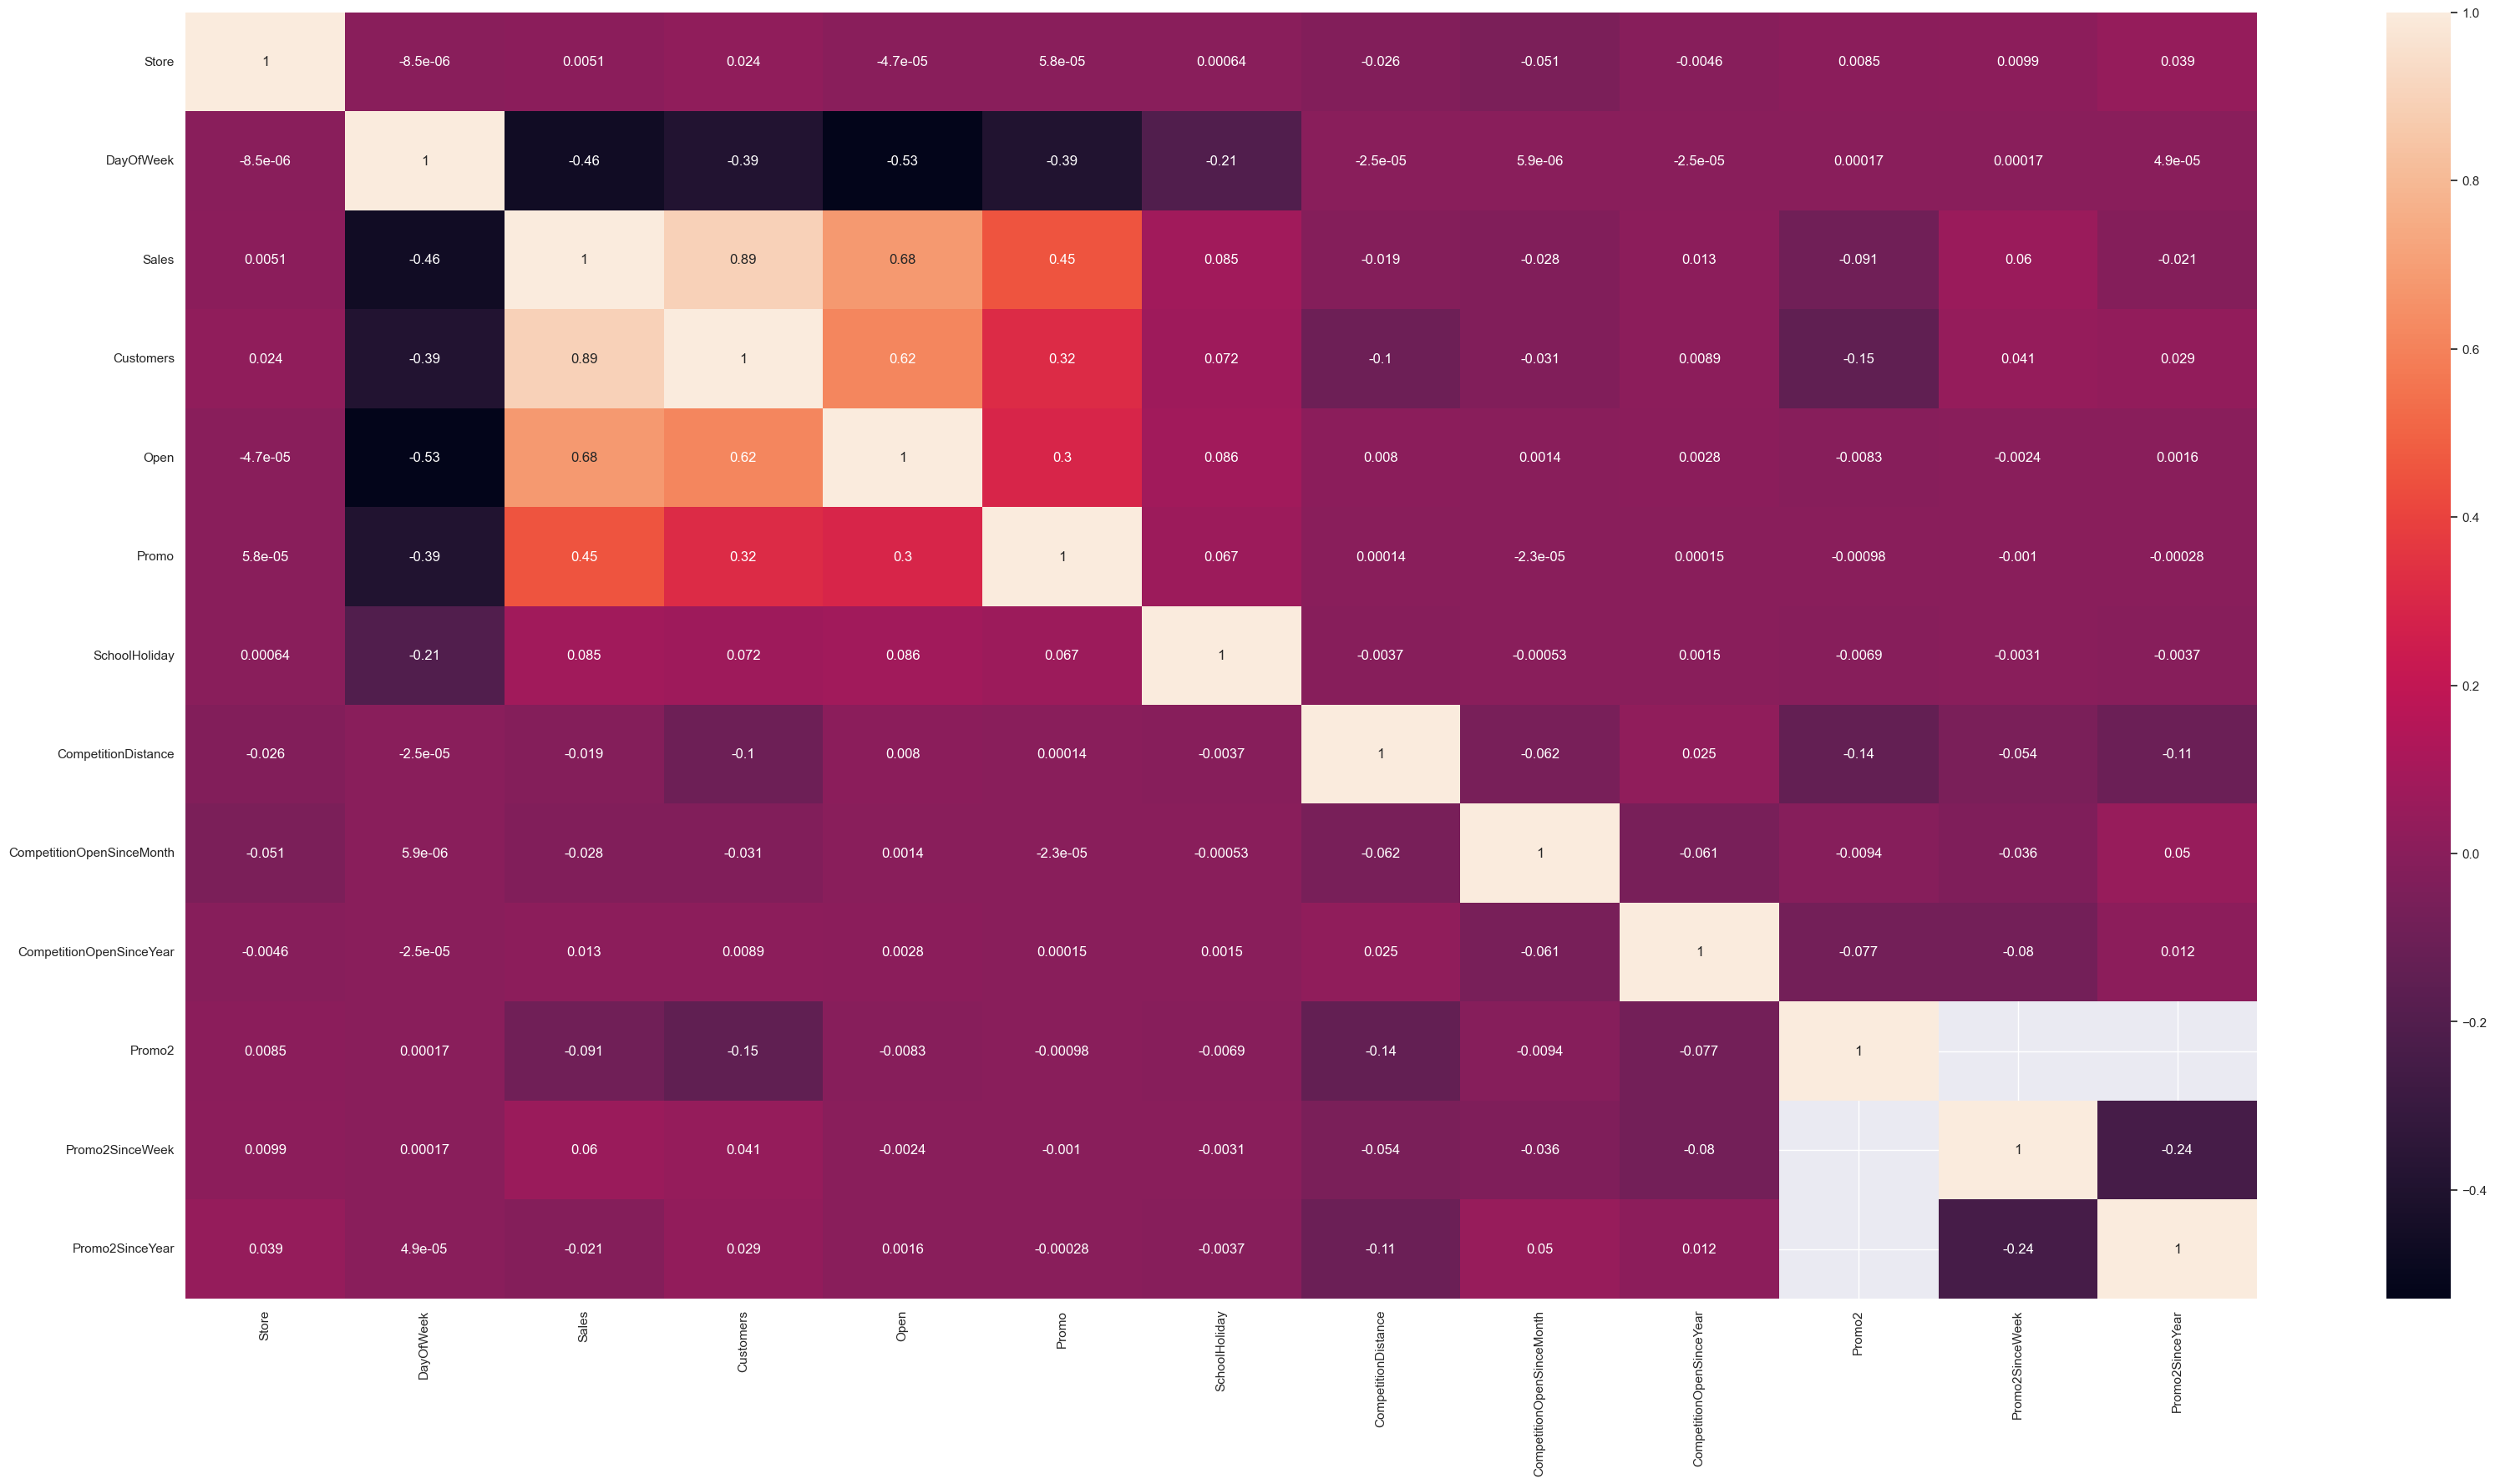

In [11]:
sns.set(rc={'figure.figsize':(40,20)})
sns.heatmap(data=train_store_combine_data.corr(),annot=True)

In [12]:
train_store_combine_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


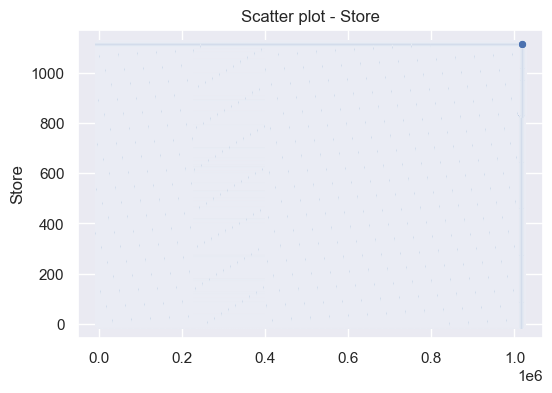

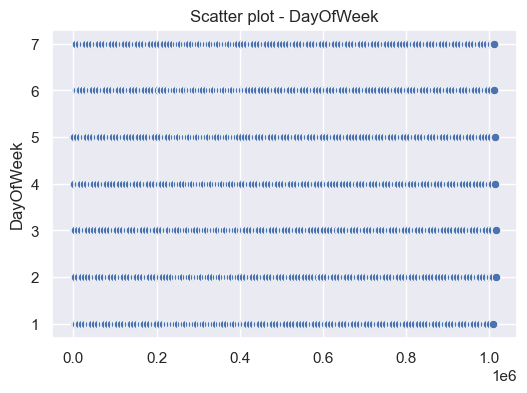

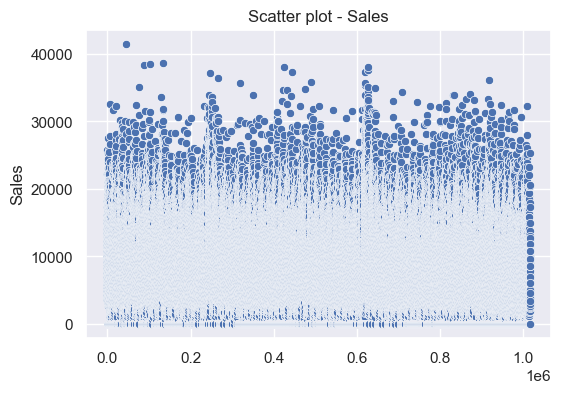

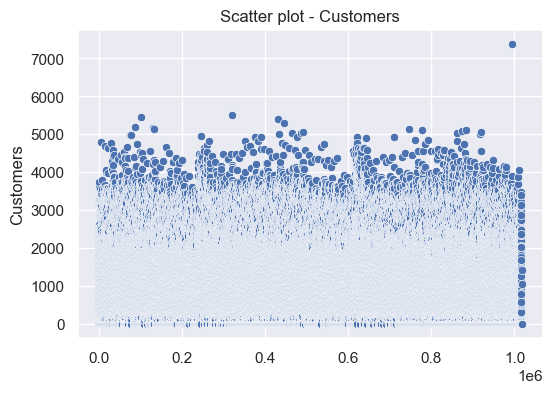

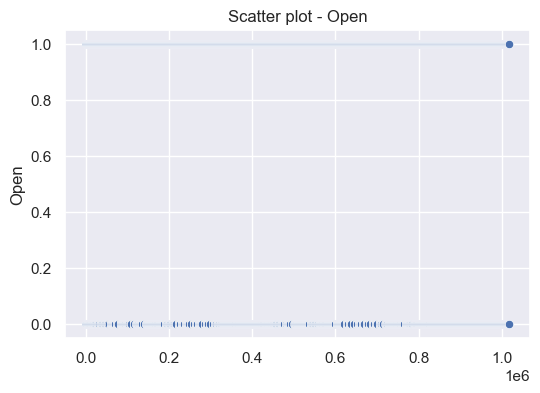

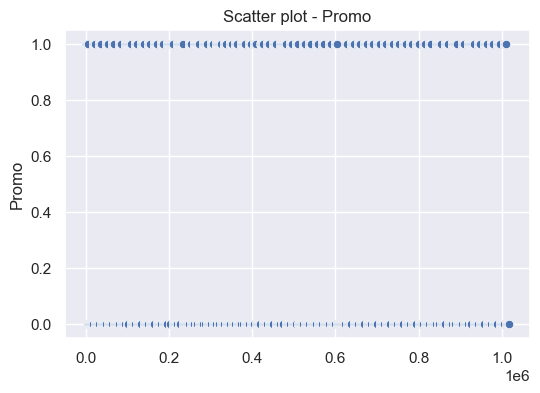

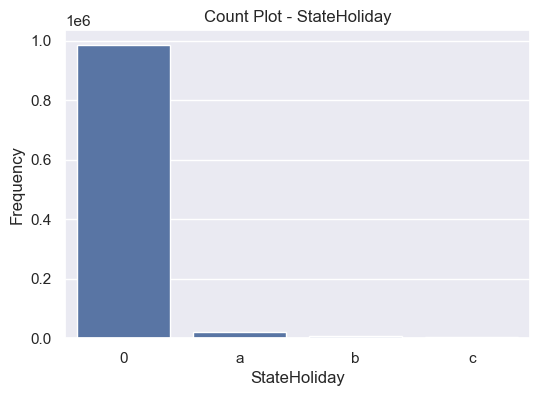

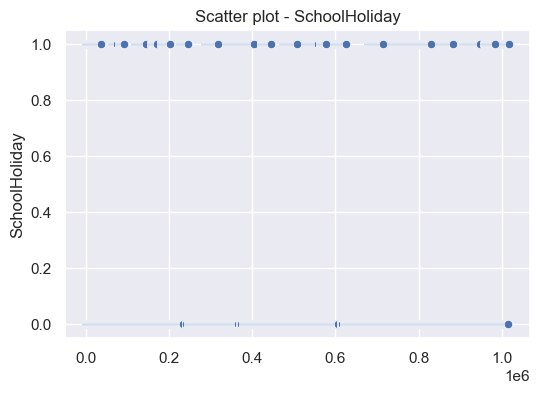

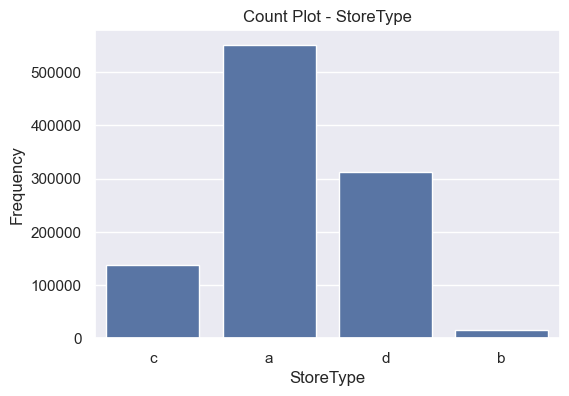

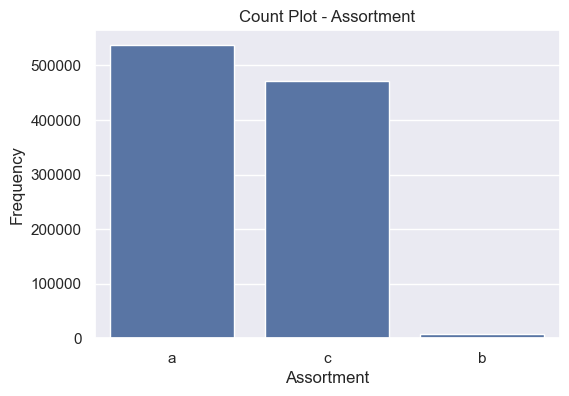

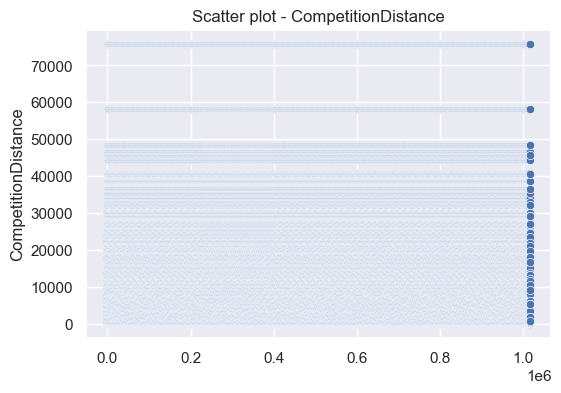

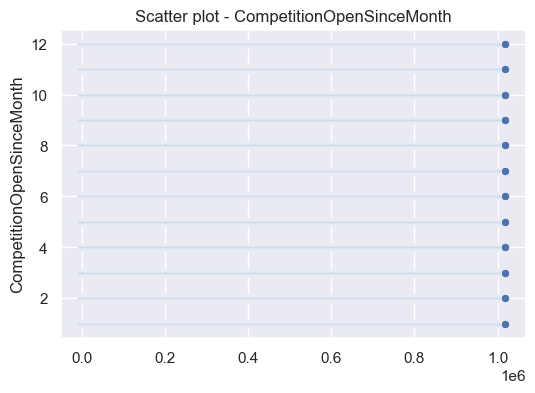

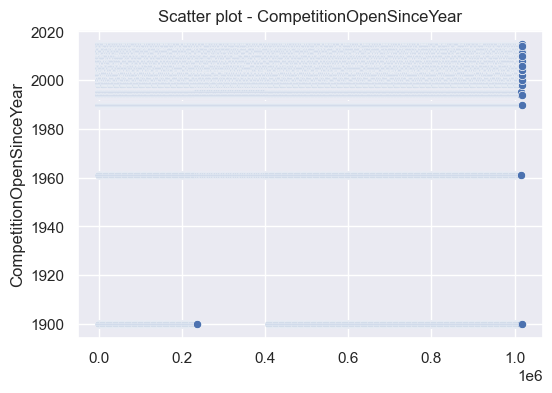

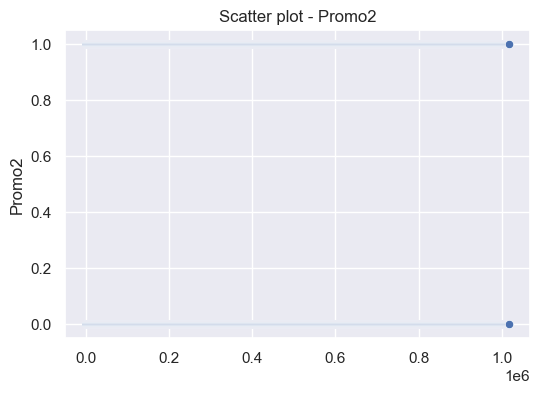

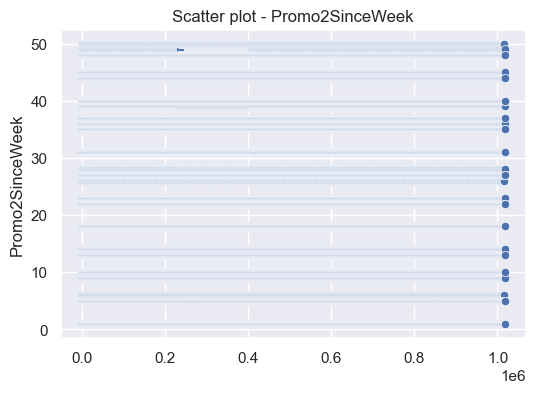

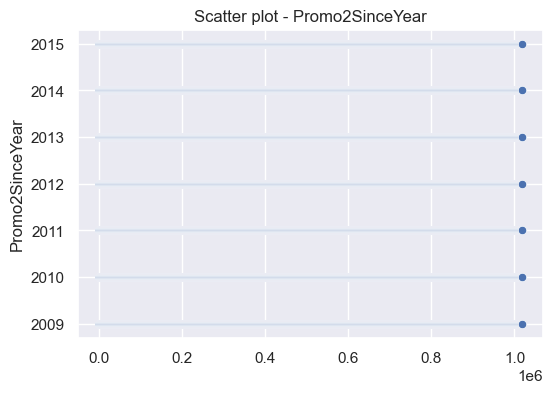

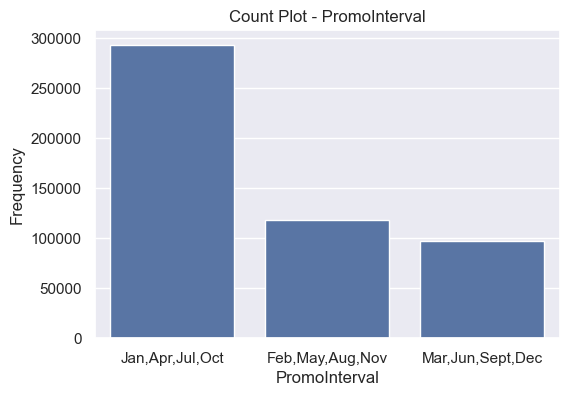

In [13]:
for i in train_store_combine_data.columns:
    if train_store_combine_data[i].dtype != 'object' and train_store_combine_data[i].dtype != 'datetime64[ns]':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=train_store_combine_data[i])
        plt.title(f'Scatter plot - {i}')
        plt.show()
    elif train_store_combine_data[i].dtype == 'object':
        plt.figure(figsize=(6, 4))
        sns.countplot(data=train_store_combine_data, x=i)
        plt.title(f'Count Plot - {i}')
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.show()

***Replaceing Outliers with Median***

In [14]:
def handle_outliers_median(df, columns_to_check):
    for column in columns_to_check:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
        df.loc[outliers_mask, column] = np.median(df[column])  # Replace outliers with median
    return df

***Combine the test and Store Data***

In [15]:
test_store_combine_data = test_data.merge(store, on='Store', how='left')
test_store_combine_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [16]:
test_store_combine_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000,40992.000000,25872.000000,25872.000000,41088.000000,23856.000000,23856.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487,5088.583138,7.035250,2008.641929,0.580607,24.426559,2011.820926
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802,7225.487467,3.143015,6.862400,0.493466,14.161312,1.692166
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000,720.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,2425.000000,7.000000,2010.000000,1.000000,22.000000,2012.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000,6480.000000,9.000000,2012.000000,1.000000,37.000000,2013.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000


In [17]:
test_store_combine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

***Changeing the date to DateTime Format***

In [18]:
test_store_combine_data['Date'] = pd.to_datetime(test_store_combine_data['Date'])

In [19]:
test_store_combine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

In [20]:
test_store_combine_data.isnull().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

# Feature's Selection

***TRAIN DATA***

**Weekday's & Weekends** 

In [21]:
train_store_combine_data['weekday'] = train_store_combine_data['Date'].dt.weekday
train_store_combine_data['is_weekend'] = train_store_combine_data['weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [22]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'
train_store_combine_data['Season'] = test_store_combine_data['Date'].dt.month.apply(get_season)

**Number Of Days To Holidays & Number Of Days After Holiday**


In [25]:
train_store_combine_data['DaysToHoliday'] = ((holiday_dates[0] - train_store_combine_data['Date']).dt.days).clip(lower=0)
train_store_combine_data['DaysAfterHoliday'] = ((train_store_combine_data['Date'] - holiday_dates[-1]).dt.days).clip(lower=0)

**Beginning of month, mid month and ending of month**

In [24]:
holiday_dates = [
    pd.to_datetime('2023-01-01'),
    pd.to_datetime('2023-04-15'),
    pd.to_datetime('2023-07-04'),
    pd.to_datetime('2023-12-25')
]

In [26]:
train_store_combine_data['IsBeginningOfMonth'] = (train_store_combine_data['Date'].dt.day <= 10).astype(int)
train_store_combine_data['IsMidOfMonth'] = ((train_store_combine_data['Date'].dt.day > 10) & (train_store_combine_data['Date'].dt.day <= 20)).astype(int)
train_store_combine_data['IsEndOfMonth'] = (train_store_combine_data['Date'].dt.day > 20).astype(int)

***TEST DATA***

In [27]:
test_store_combine_data['weekday'] = test_store_combine_data['Date'].dt.weekday
test_store_combine_data['is_weekend'] = test_store_combine_data['weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [28]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

test_store_combine_data['Season'] = test_store_combine_data['Date'].dt.month.apply(get_season)

**Number Of Days To Holidays & Number Of Days After Holiday**

In [29]:
test_store_combine_data['DaysToHoliday'] = ((holiday_dates[0] - test_store_combine_data['Date']).dt.days).clip(lower=0)
test_store_combine_data['DaysAfterHoliday'] = ((test_store_combine_data['Date'] - holiday_dates[-1]).dt.days).clip(lower=0)

**Beginning of month, mid month and ending of month**

In [30]:
test_store_combine_data['IsBeginningOfMonth'] = (test_store_combine_data['Date'].dt.day <= 10).astype(int)
test_store_combine_data['IsMidOfMonth'] = ((test_store_combine_data['Date'].dt.day > 10) & (test_store_combine_data['Date'].dt.day <= 20)).astype(int)
test_store_combine_data['IsEndOfMonth'] = (test_store_combine_data['Date'].dt.day > 20).astype(int)

# LABEL ENCODING 

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

***For Train Dataset***

In [32]:
train_store_combine_data['StateHoliday'] = train_store_combine_data['StateHoliday'].astype(str)

In [33]:
train_store_combine_data['StoreType'] = encoder.fit_transform(train_store_combine_data['StoreType'])
train_store_combine_data['StateHoliday'] = encoder.fit_transform(train_store_combine_data['StateHoliday'])
train_store_combine_data['Assortment'] = encoder.fit_transform(train_store_combine_data['Assortment'])
train_store_combine_data['PromoInterval'] = encoder.fit_transform(train_store_combine_data['PromoInterval'])
train_store_combine_data['Season'] = encoder.fit_transform(train_store_combine_data['Season'])
#train_store_combine_data['StateHoliday'] = train_store_combine_data['StateHoliday'].astype(str)

***For Test DataSet***

In [34]:
test_store_combine_data['StateHoliday'] = encoder.fit_transform(test_store_combine_data['StateHoliday'])
test_store_combine_data['Assortment'] = encoder.fit_transform(test_store_combine_data['Assortment'])
test_store_combine_data['PromoInterval'] = encoder.fit_transform(test_store_combine_data['PromoInterval'])
test_store_combine_data['Season'] = encoder.fit_transform(test_store_combine_data['Season'])
test_store_combine_data['StoreType'] = encoder.fit_transform(test_store_combine_data['StoreType'])
test_store_combine_data['StateHoliday'] = test_store_combine_data['StateHoliday'].astype(str)

***Standarizeing the Data***

In [35]:
train_store_combine_data.set_index('Date', inplace=True)
train_store_combine_data.sort_index(inplace=True)
test_store_combine_data.set_index('Date', inplace=True)
test_store_combine_data.sort_index(inplace=True)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [37]:
train_store_combine_data_scaled = scaler.fit_transform(train_store_combine_data)

In [38]:
test_store_combine_data_scaled = scaler.fit_transform(test_store_combine_data)

***Machine Learing Model Building***

In [39]:
train_store_combine_data['SalesPerCustomer'] = train_store_combine_data['Sales'] / train_store_combine_data['Customers']

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

***Filling Null Values In Train Dataset Using Loop Function***

In [41]:
for i in train_store_combine_data.columns:
    # check if the datatype is object or not
    if train_store_combine_data[i].dtypes == "object":
        # if the datatype is object : --> fillna with mode of that column
        mode_value = train_store_combine_data[i].mode()[0]
        train_store_combine_data[i].fillna(mode_value, inplace = True)
    elif train_store_combine_data[i].dtypes != "object":
        # if data[i].dtypes == "bool":
        #     data[i].fillna(0, inplace = True)
        # else:
        # else if the datatype is numerical : --> fillna with mean of that column
        mean_value = train_store_combine_data[i].mean()
        train_store_combine_data[i].fillna(mean_value, inplace = True)

In [42]:
train_store_combine_data.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
weekday                      0
is_weekend                   0
Season                       0
DaysToHoliday                0
DaysAfterHoliday             0
IsBeginningOfMonth           0
IsMidOfMonth                 0
IsEndOfMonth                 0
SalesPerCustomer             0
dtype: int64

***Filling Null Values In Test Dataset Using Loop Function***

In [43]:
for i in test_store_combine_data.columns:
    # check if the datatype is object or not
    if test_store_combine_data[i].dtypes == "object":
        # if the datatype is object : --> fillna with mode of that column
        mode_value = test_store_combine_data[i].mode()[0]
        test_store_combine_data[i].fillna(mode_value, inplace = True)
    elif test_store_combine_data[i].dtypes != "object":
        mean_value = test_store_combine_data[i].mean()
        test_store_combine_data[i].fillna(mean_value, inplace = True)

In [44]:
test_store_combine_data.isnull().sum()

Id                           0
Store                        0
DayOfWeek                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
weekday                      0
is_weekend                   0
Season                       0
DaysToHoliday                0
DaysAfterHoliday             0
IsBeginningOfMonth           0
IsMidOfMonth                 0
IsEndOfMonth                 0
dtype: int64

In [45]:
# Define X and y
X = train_store_combine_data[['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
                      'StoreType', 'Assortment', 'CompetitionDistance',
                      'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
                      'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'weekday',
                      'is_weekend', 'Season', 'IsBeginningOfMonth',
                      'IsMidOfMonth', 'IsEndOfMonth', 'DaysToHoliday', 'DaysAfterHoliday']]
y = train_store_combine_data['SalesPerCustomer']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Linear Regression***

In [47]:
Lr_regressor = LinearRegression()

In [48]:
Lr_regressor.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = Lr_regressor.predict(X_test)
y_pred

array([ 9.50012312, 11.30210156,  9.98739809, ..., 10.42757363,
        8.11979017,  9.02772999])

***Mean Squared Error***

In [51]:
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", MSE)

Mean Squared Error: 2.7070744422775737


***Random Forest Regressor***

In [52]:
from sklearn.ensemble import RandomForestRegressor

Random_forest_regressor = RandomForestRegressor(random_state=42)
Random_forest_regressor.fit(X_train, y_train)
Random_forest_y_pred = Random_forest_regressor.predict(X_test)

forest_mse = mean_squared_error(y_test, Random_forest_y_pred)
print("Random Forest MSE:", forest_mse)

Random Forest MSE: 0.28534271751981727


***Save the model using pickle***

In [53]:
# Save the model using pickle
import pickle
with open('Random_forest_regressor.pickle', 'wb') as f:
    pickle.dump('model', f)

In [56]:
import pickle
from datetime import datetime

regressor_model_file_name = f'reg-{datetime.now().strftime("%Y-%m-%d-%H:%M:%S")}.pkl'
Random_forest_regressor_model_file_name = f'lt-{datetime.now().strftime("%Y-%m-%d-%H:%M:%S")}.pkl'
#dt_model_file_name = f'dt-{datetime.now().strftime("%Y-%m-%d-%H:%M:%S")}.pkl'

files_path = [regressor_model_file_name, Random_forest_regressor_model_file_name]
models = [Lr_regressor,Random_forest_regressor]

print(regressor_model_file_name)
print(Random_forest_regressor_model_file_name)

reg-2024-04-10-22:46:54.pkl
lt-2024-04-10-22:46:54.pkl


In [ ]:
!pip install config

In [57]:
from config import Config

In [58]:
from pathlib import Path

class Config:
    RANDOM_SEED = 42
    ASSETS_PATH = Path("../")
    REPO = r"E:\AI and Data Science\NEXT HIKES 2\models"
    MODELS_PATH = ASSETS_PATH / "models"
    DATASET_FILE_PATH = "data/store.csv"
    DATASET_PATH = ASSETS_PATH / "data"
    FEATURES_PATH = ASSETS_PATH / "features"
    MODELS_PATH = ASSETS_PATH / "models"
    METRICS_FILE_PATH = ASSETS_PATH / "metrics"

In [59]:
models_path = Config.MODELS_PATH
print(models_path)

..\models


In [60]:
path = models_path / "lt-2024-03-025-00:25:52.pkl"
path

WindowsPath('../models/lt-2024-03-025-00:25:52.pkl')

In [66]:
# Dump Random Forest because it has better accuracy
import os

model_dir = '../models/'
model_path = os.path.join(model_dir, datetime.now().strftime("%Y-%m-%d-%H-%M-%S") + '-dt.pkl')

# Create the models directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save the Random Forest model using pickle
with open(model_path, 'wb') as model_file:
    pickle.dump(Random_forest_regressor, model_file)

print(f"Random Forest model saved at {model_path}")

Random Forest model saved at ../models/2024-04-10-23-34-30-dt.pkl


# Time Series Analysis

In [ ]:
!pip install tensorflow

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 107s 4ms/step - loss: 567.6079 - val_loss: 2.8657
Epoch 2/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - loss: 2.9006 - val_loss: 2.4596
Epoch 3/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 110s 4ms/step - loss: 2.5982 - val_loss: 2.3539
Epoch 4/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 77s 3ms/step - loss: 2.4590 - val_loss: 2.2464
Epoch 5/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 95s 4ms/step - loss: 2.3508 - val_loss: 2.3074
Epoch 6/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - loss: 2.2946 - val_loss: 2.2238
Epoch 7/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 95s 4ms/step - loss: 2.2569 - val_loss: 2.1381
Epoch 8/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 98s 4ms/step - loss: 2.2260 - val_loss: 2.1919
Epoch 9/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 94s 4ms/step - loss: 2.2125 - val_loss: 2.0635
Epoch 10/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 98s 4ms/step - loss: 2.1539 - val_loss: 2.0964


In [62]:
y_pred_rnn = model.predict(X_test)

# Calculate MSE
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
print("Mean Squared Error (RNN):", mse_rnn)

6358/6358 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
Mean Squared Error (RNN): 2.0963711830144782


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

X_train_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], 1)),
    Dense(1)  # Output layer for regression
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))

C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 209s 8ms/step - loss: 923.9875 - val_loss: 19.9584
Epoch 2/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 160s 6ms/step - loss: 246356.4531 - val_loss: 82.4049
Epoch 3/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 164s 6ms/step - loss: 32.3173 - val_loss: 3.5539
Epoch 4/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 171s 7ms/step - loss: 5.1066 - val_loss: 3.4861
Epoch 5/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 178s 7ms/step - loss: 11.1886 - val_loss: 3.5618
Epoch 6/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 164s 6ms/step - loss: 7.6809 - val_loss: 1.9569
Epoch 7/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 172s 7ms/step - loss: 1.8359 - val_loss: 1.4087
Epoch 8/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 169s 7ms/step - loss: 54325.7422 - val_loss: 33.0909
Epoch 9/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 163s 6ms/step - loss: 2223.7241 - val_loss: 24.2553
Epoch 10/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 162s 6ms/step - loss: 188.5787 - val_loss: 97.4082


In [64]:
# Predict using the trained LSTM model
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Calculate MSE
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print("Mean Squared Error (LSTM):", mse_lstm)

6358/6358 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
Mean Squared Error (LSTM): 97.40825105960644


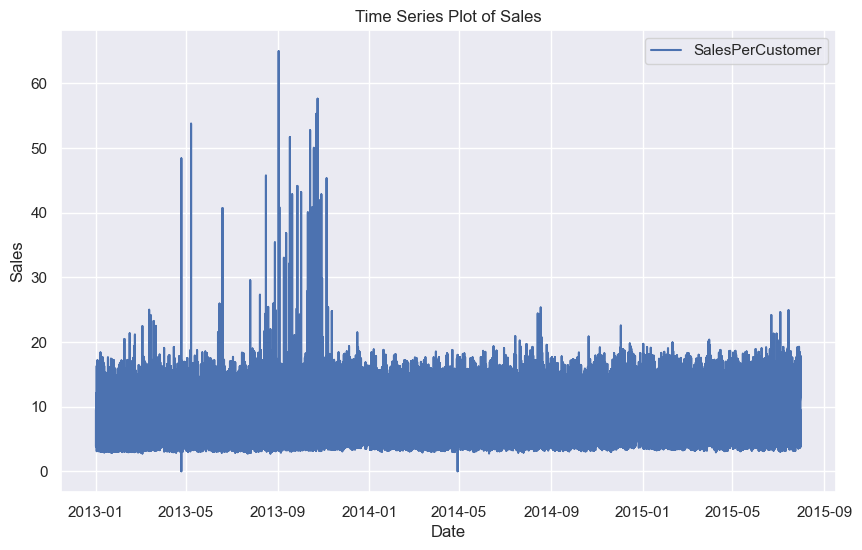

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(train_store_combine_data['SalesPerCustomer'], label='SalesPerCustomer')
plt.title('Time Series Plot of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

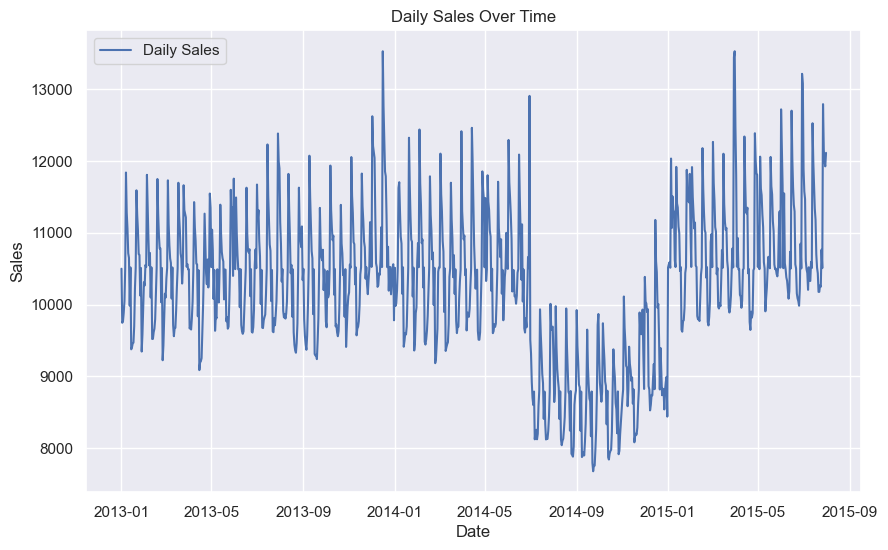

In [70]:
# Resample the data on a daily basis and calculate the daily sum of sales
daily_sales = train_store_combine_data['SalesPerCustomer'].resample('D').sum()

# Plot daily sales over time
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales Over Time')
plt.legend()
plt.show()

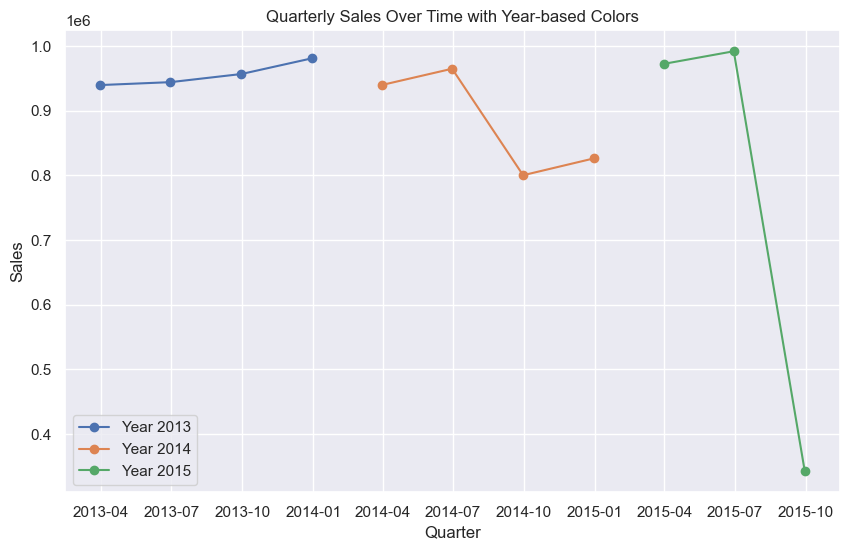

In [71]:
quarterly_sales = train_store_combine_data['SalesPerCustomer'].resample('Q').sum()

# Extract years from the index
years = quarterly_sales.index.year

# Plot quarterly sales over time with colors based on year
plt.figure(figsize=(10, 6))
for year in sorted(years.unique()):
    quarterly_sales_year = quarterly_sales[years == year]
    plt.plot(quarterly_sales_year.index, quarterly_sales_year.values, marker='o', linestyle='-', label=f'Year {year}')

plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Quarterly Sales Over Time with Year-based Colors')
plt.legend()
plt.grid(True)
plt.show()

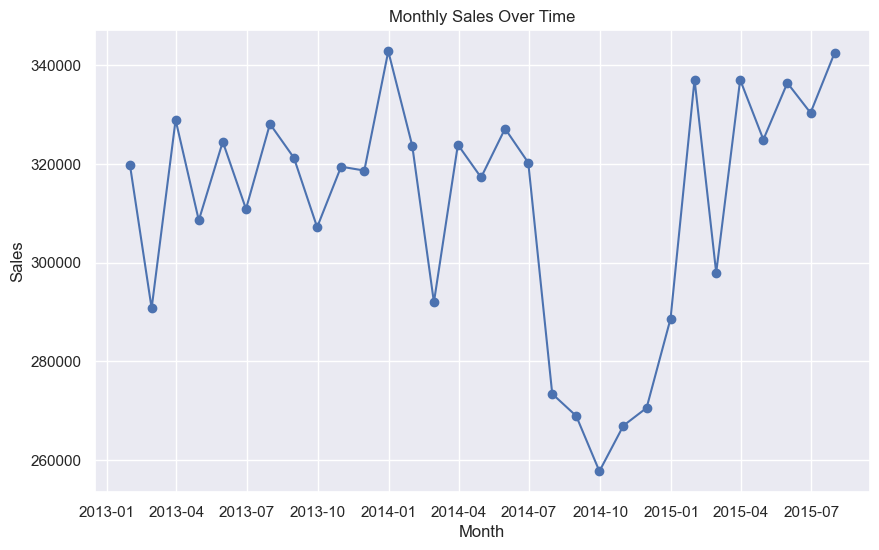

In [72]:
monthly_sales = train_store_combine_data['SalesPerCustomer'].resample('M').sum()

# Plot monthly sales over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Over Time')
plt.grid(True)
plt.show()

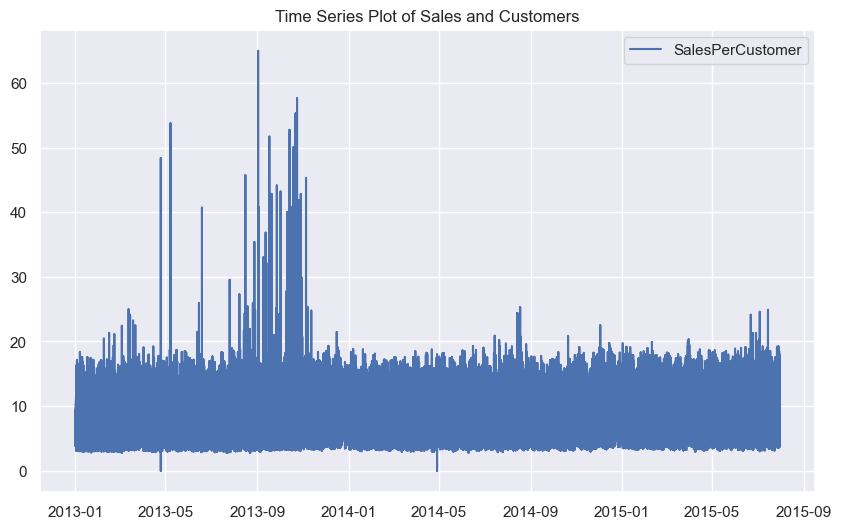

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(train_store_combine_data['SalesPerCustomer'], label='SalesPerCustomer')

plt.title('Time Series Plot of Sales and Customers')
plt.legend()

***Checking the trends and seasonality in the data***

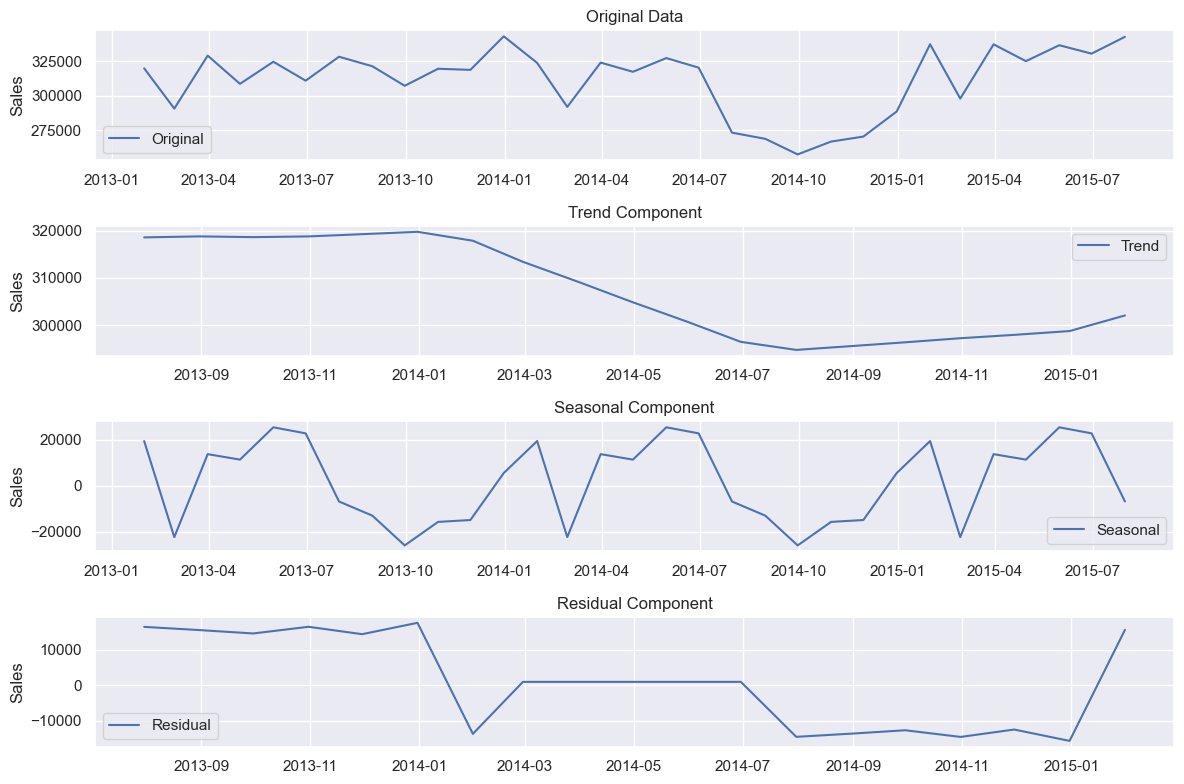

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_sales, model='additive')

# Plot original, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(monthly_sales, label='Original')
plt.legend()
plt.ylabel('Sales')
plt.title('Original Data')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend()
plt.ylabel('Sales')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()
plt.ylabel('Sales')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.ylabel('Sales')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

****Trend Component**** : *The trend component represents the underlying long-term movement or direction in the data. In our analysis, we noticed slight variations in the trend over time. This suggests that the overall pattern of sales has experienced subtle changes or fluctuations, possibly influenced by external factors, market trends, or business strategies.*

****Seasonality Component****: *Seasonality refers to recurring patterns that repeat at fixed intervals. Interestingly, we found that the seasonality component remained relatively constant throughout the time period under consideration. This implies that the sales data consistently exhibits a similar repeating pattern at regular intervals, which could be attributed to factors such as holidays, promotions, or other recurrent events.*



****Residuals Component****: *The residuals component captures the random and unpredictable fluctuations in the data that are not accounted for by the trend and seasonality components. Our analysis revealed varying residuals, indicating that there are periods where the observed sales values deviate from what can be explained by the trend and seasonality. These deviations might be caused by unexpected events, noise, or unmodeled factors.*



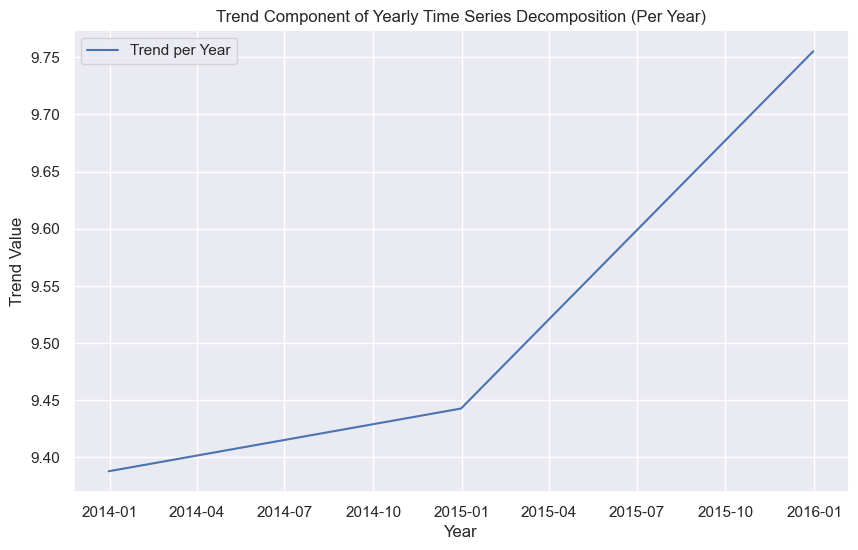

In [76]:
decomposition_result = seasonal_decompose(train_store_combine_data['SalesPerCustomer'], model='additive', period=365)
trend_data = decomposition_result.trend

# Grouping trend data by year and calculate mean
trend_data_per_year = trend_data.resample('Y').mean()

# Plot the trend component per year
plt.figure(figsize=(10, 6))
plt.plot(trend_data_per_year.index, trend_data_per_year, label='Trend per Year')
plt.title('Trend Component of Yearly Time Series Decomposition (Per Year)')
plt.xlabel('Year')
plt.ylabel('Trend Value')
plt.legend()
plt.show()

*The yearly time series decomposition highlights a consistent increasing trend component over each year. This suggests a steady growth in sales performance, possibly influenced by expanding customer engagement, heightened demand, or effective business strategies. This valuable insight offers a strategic advantage, enabling businesses to align resources and decisions with the upward sales trajectory for enhanced growth and competitiveness.*

<Figure size 1000x600 with 0 Axes>

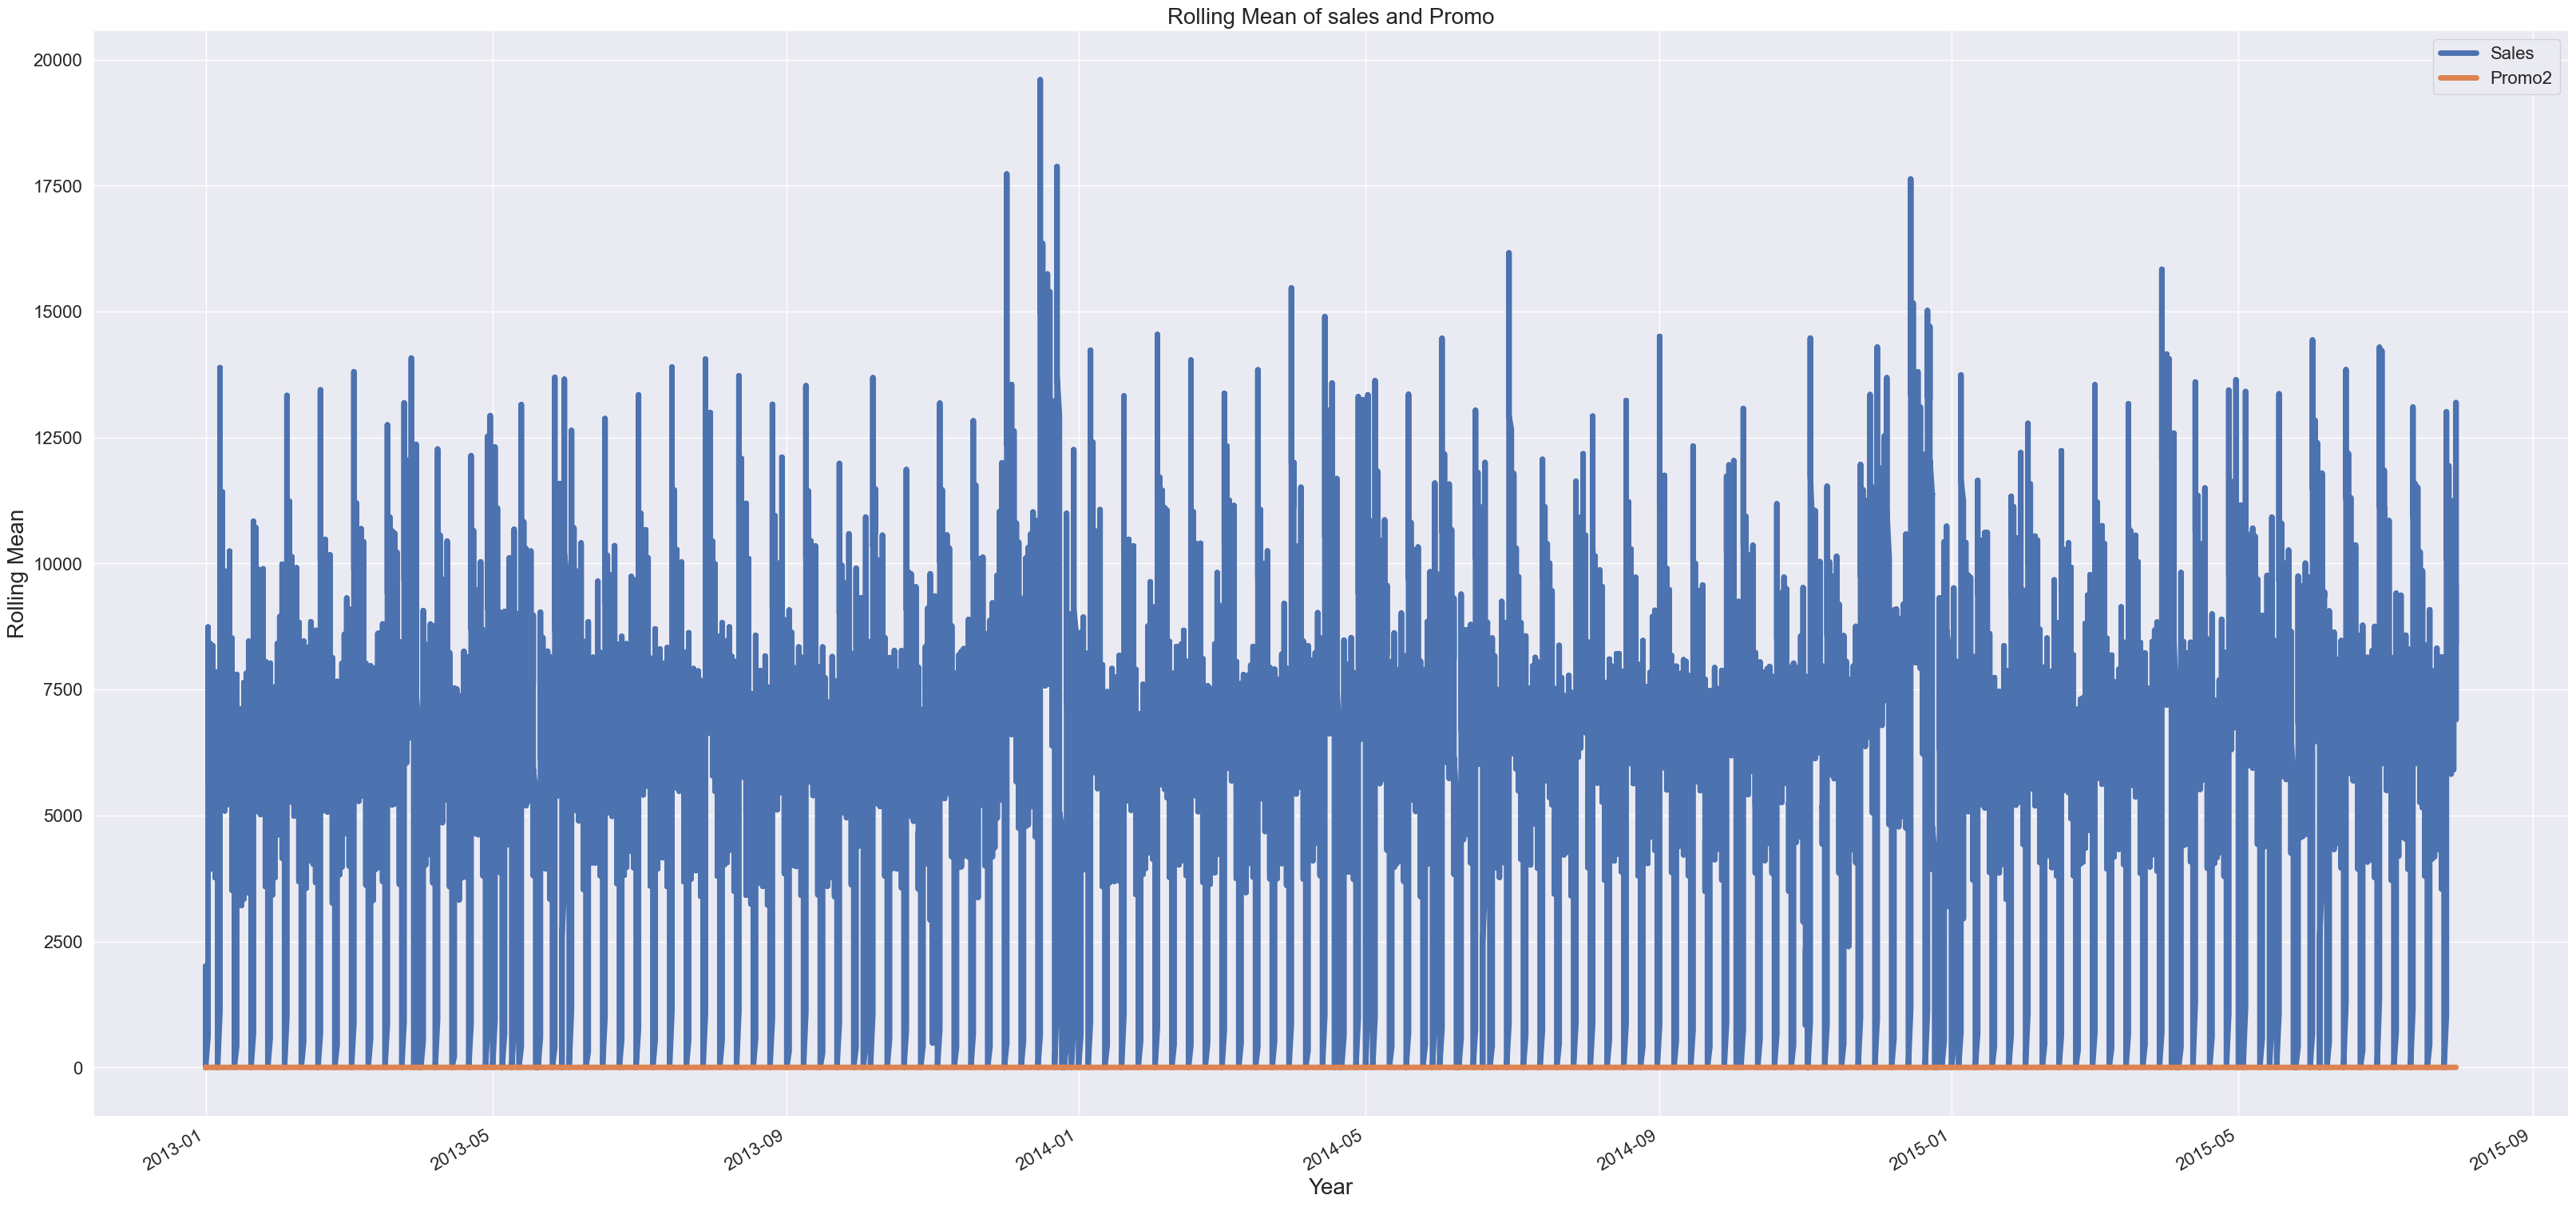

In [79]:
# Choose the columns for which you want to calculate the rolling mean
selected_columns = ['Sales','Promo2']  # Replace with your actual column names

# Calculate the rolling mean with a window size of 12 months for each selected column
rolling_means = train_store_combine_data[selected_columns].rolling(window=12).mean()

# Plot the rolling means of the selected columns
plt.figure(figsize=(10, 6))
rolling_means.plot(linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Rolling Mean', fontsize=20)
plt.title('Rolling Mean of sales and Promo', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

****Resampled time series****

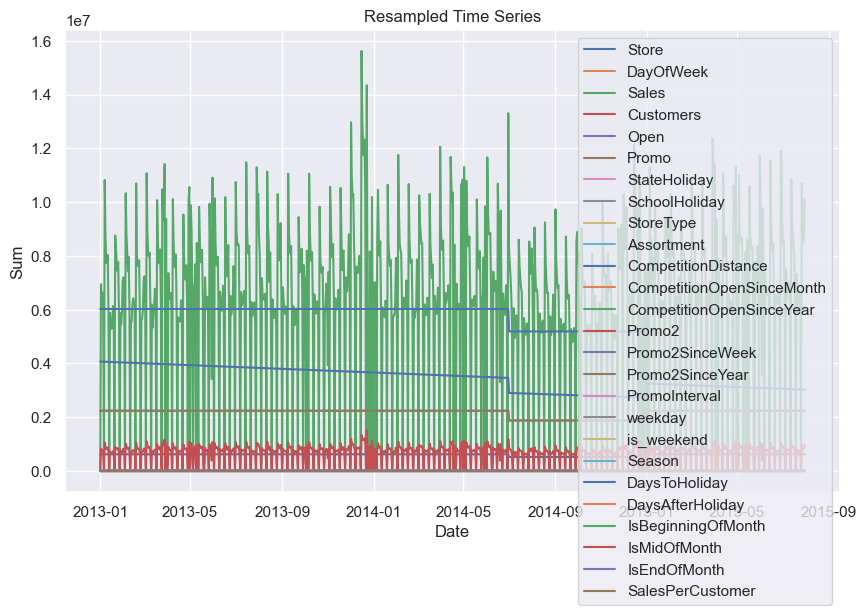

In [80]:
# Convert the index to datetime format
train_store_combine_data.index = pd.to_datetime(train_store_combine_data.index)

# Selecting only numeric columns for summation
numeric_columns = train_store_combine_data.select_dtypes(include=['number']).columns

# Resampling the data
train_data_resampled = train_store_combine_data[numeric_columns].resample('D').sum()

# Plot the time series
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.plot(train_data_resampled.index, train_data_resampled[column], label=column)
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Resampled Time Series')
plt.legend()
plt.show()

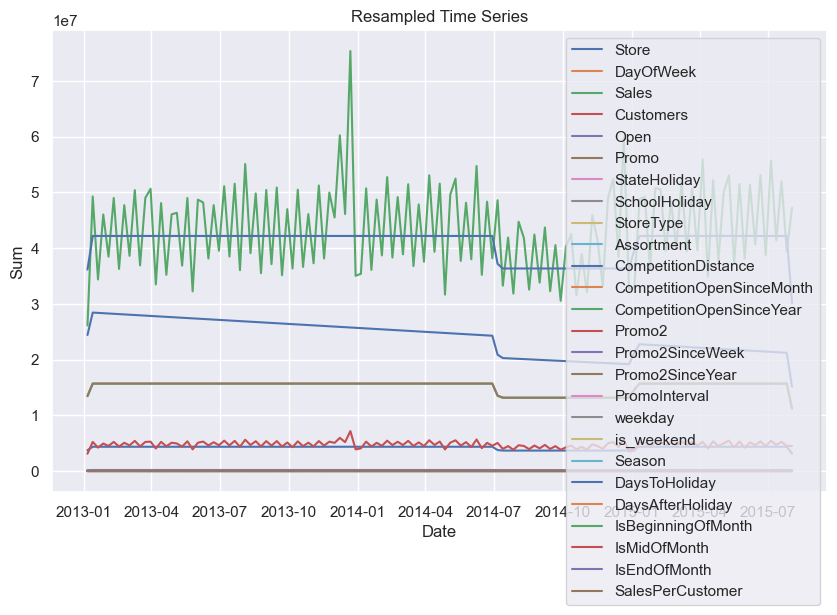

In [81]:
# Resampling the data at a lower frequency (e.g., weekly) for better visualization
resample_frequency = 'W'  # Adjust this frequency as needed
train_data_resampled = train_store_combine_data[numeric_columns].resample(resample_frequency).sum()

# Plot the time series
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.plot(train_data_resampled.index, train_data_resampled[column], label=column)
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Resampled Time Series')
plt.legend()
plt.show()

In [83]:
# Resampling the data to a weekly frequency and calculating the mean
columns_to_resample = ['Sales', 'Customers']  
train_data_weekly_mean = train_store_combine_data[columns_to_resample].resample('W').mean()

print(train_data_weekly_mean)

                  Sales   Customers
Date                               
2013-01-06  3906.314098  465.032441
2013-01-13  6313.289174  669.615631
2013-01-20  4404.582319  538.852402
2013-01-27  5898.804484  631.496861
2013-02-03  4928.382960  577.533632
...                 ...         ...
2015-07-05  7135.231390  695.328764
2015-07-12  5303.175144  599.558360
2015-07-19  6663.474568  672.192441
2015-07-26  5048.317104  573.547085
2015-08-02  8471.914439  807.577578

[135 rows x 2 columns]


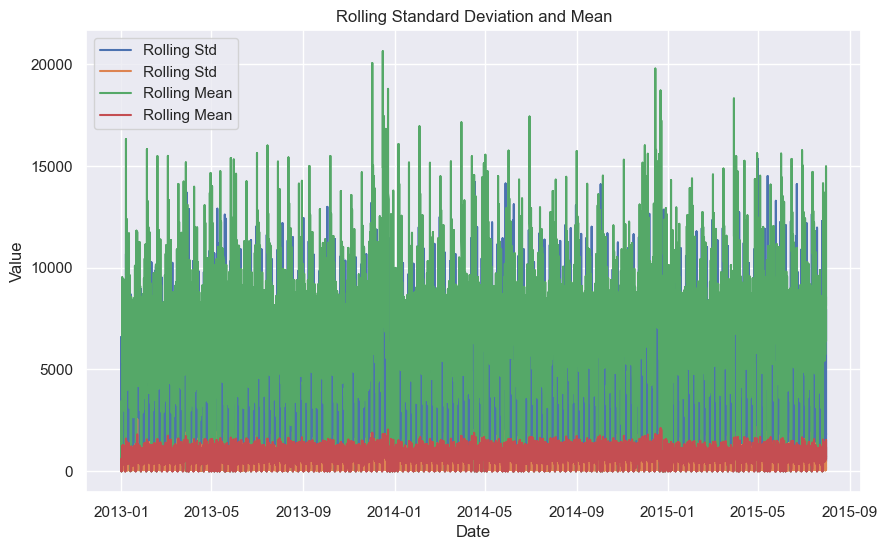

In [84]:
# Columns to calculate rolling statistics for
columns_to_calculate = ['Sales', 'Customers']

# Calculating rolling standard deviation and mean with a window size of 7 days
rolling_std = train_store_combine_data[columns_to_calculate].rolling(window=7).std()
rolling_mean = train_store_combine_data[columns_to_calculate].rolling(window=7).mean()

# Plotting the rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(rolling_std, label='Rolling Std')
plt.plot(rolling_mean, label='Rolling Mean')
plt.title('Rolling Standard Deviation and Mean')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Irregularity

In [85]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [86]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    print("Is Stationary:", result[1] <= 0.05)

# Subsample a portion of the time series
subsample_size = 1000  # Adjust the size as needed
subsampled_series = train_store_combine_data['SalesPerCustomer'].sample(n=subsample_size)

# Perform the ADF test on the subsampled series
adf_test(subsampled_series)

ADF Statistic: -33.64462191088978
p-value: 0.0
Critical Values: {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}
Is Stationary: True


In [87]:
# Subsample a portion of the time series
subsample_size = 1000
subsampled_series = train_store_combine_data['SalesPerCustomer'].sample(n=subsample_size)

# Perform the ADF test on the subsampled series
adf_test(subsampled_series)

ADF Statistic: -23.61185826395101
p-value: 0.0
Critical Values: {'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573}
Is Stationary: True


In [88]:
# Resample the time series data to a larger time interval (e.g., monthly)
monthly_aggregated_series = train_store_combine_data['SalesPerCustomer'].resample('M').sum()

# Perform the ADF test on the aggregated series
adf_test(monthly_aggregated_series)

ADF Statistic: -2.730534104187798
p-value: 0.06890192551500172
Critical Values: {'1%': -3.6699197407407405, '5%': -2.9640707407407407, '10%': -2.621171111111111}
Is Stationary: False


In [89]:
import copy
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15, 10

In [91]:
def show_plot(
    data,
    figsize=(15, 10),
    color="blue",
    linestyle="-",
    xlabel="Time",
    ylabel="Value",
    label=None,
):
    plt.figure(figsize=figsize)
    plt.plot(data.index, data, color=color, linestyle=linestyle, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=2)
    plt.show()


****ARIMA (AutoRegressive Integrated Moving Average):****

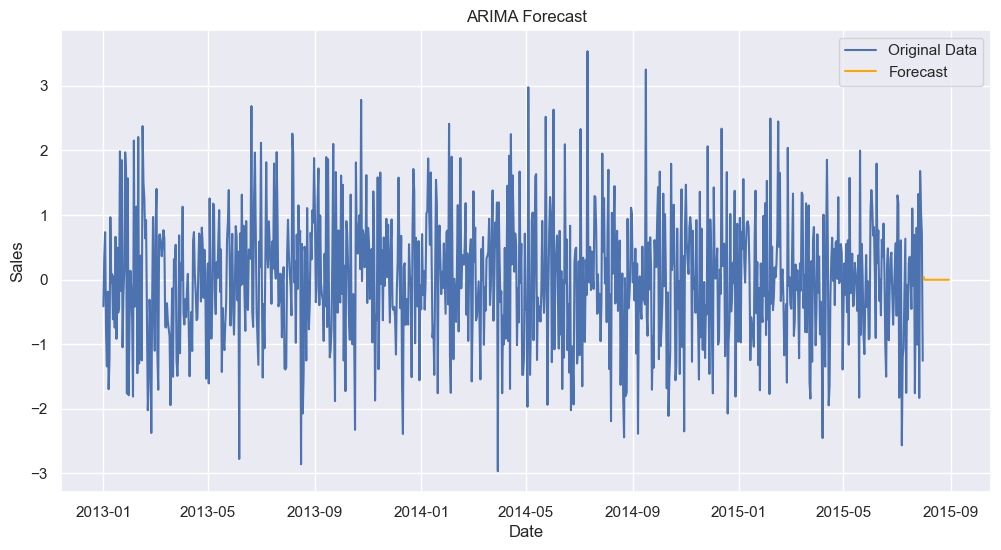

In [92]:
from statsmodels.tsa.arima.model import ARIMA


time_series_data = train_store_combine_data['SalesPerCustomer']

min_date = pd.to_datetime('2013-01-01')
max_date = pd.to_datetime('2015-07-31')
date_rng = pd.date_range(start=min_date, end=max_date, freq='D')
time_series_data = pd.Series(np.random.randn(len(date_rng)), index=date_rng)

# Fit ARIMA model
model = ARIMA(time_series_data, order=(1, 0, 0))
model_fit = model.fit()

# Make predictions for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the original time series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Original Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [93]:
!pip install pmdarima

     -------------------------------------- 613.3/613.3 kB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 8.8 MB/s eta 0:00:00


In [94]:
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [95]:
print(train_store_combine_data.dtypes)


# Downsample the 'Sales' column to monthly frequency
monthly_sales = train_store_combine_data.resample('M')['SalesPerCustomer'].sum()

# Define a function to perform ADF test for stationarity
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    p_value = result[1]
    return p_value <= 0.05

# Check if differencing is needed
if adf_test(monthly_sales):
    d = 0
else:
    d = 1

# Use auto_arima for automatic ARIMA order selection
model = auto_arima(monthly_sales, start_p=1, start_q=1,
                   max_p=3, max_q=3, m=12,
                   start_P=0, seasonal=True,
                   d=d, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Fit the ARIMA model
model_fit = model.fit(monthly_sales)

# Print the model summary
print(model_fit.summary())


Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                   int32
SchoolHoliday                  int64
StoreType                      int32
Assortment                     int32
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int32
weekday                        int64
is_weekend                     int64
Season                         int32
DaysToHoliday                  int64
DaysAfterHoliday               int64
IsBeginningOfMonth             int32
IsMidOfMonth                   int32
IsEndOfMonth                   int32
SalesPerCustomer             float64
dtype: object
Performing stepwise sear

****SARIMAX MODEL****

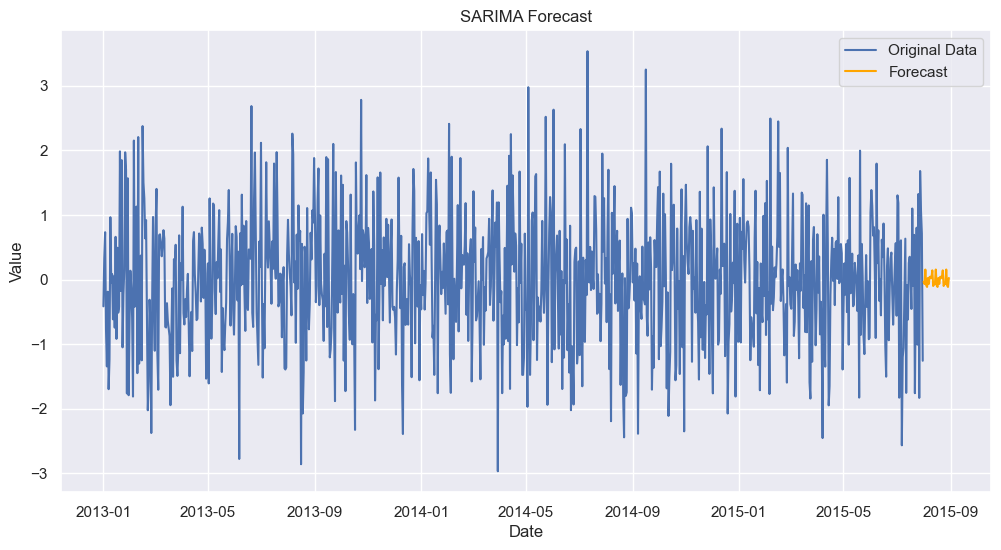

In [96]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Fit SARIMA model
model = SARIMAX(time_series_data, order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Make predictions for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the original time series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Original Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.legend()
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()